# PyTorch Computer Vision

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from helper_functions import accuracy_fn

## Creating Dataset

In [8]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None    
)

In [9]:
len(train_data), len(test_data)

(60000, 10000)

In [10]:
image, label = train_data[0]
print(image, label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [11]:
class_names = train_data.classes
print(class_names)

class_to_idx = train_data.class_to_idx
print(class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [12]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
print(f'Image shape: {image.shape}')
print(f'Image label: {class_to_idx}')

Image shape: torch.Size([1, 28, 28])
Image label: {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


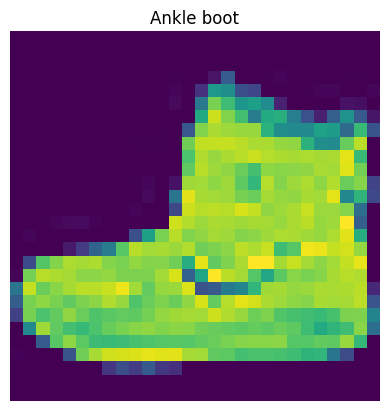

In [14]:
#visualize the image
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)
plt.show()

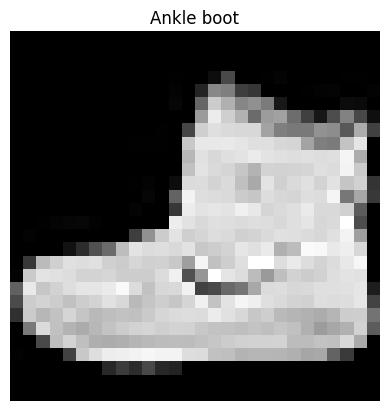

In [15]:
#visualize the image in gray scale
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

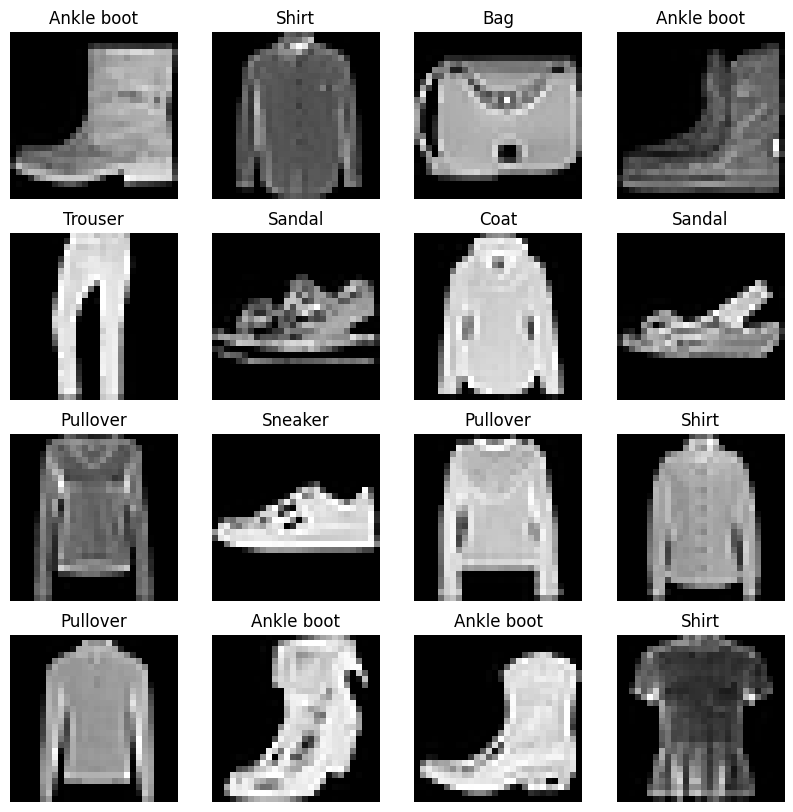

In [16]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)
plt.show()

In [17]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [18]:
# setup data loaders
BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x23927546de0>,
 <torch.utils.data.dataloader.DataLoader at 0x2392750af60>)

In [19]:
print(f'Data loader: {train_loader, test_loader}')
print(f'BATCH_SIZE: {BATCH_SIZE}')
print(f'Lebgth of train loader: {len(train_loader)}')
print(f'Lebgth of test loader: {len(test_loader)}')

Data loader: (<torch.utils.data.dataloader.DataLoader object at 0x0000023927546DE0>, <torch.utils.data.dataloader.DataLoader object at 0x000002392750AF60>)
BATCH_SIZE: 32
Lebgth of train loader: 1875
Lebgth of test loader: 313


In [20]:
#Check what is inside the data loader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

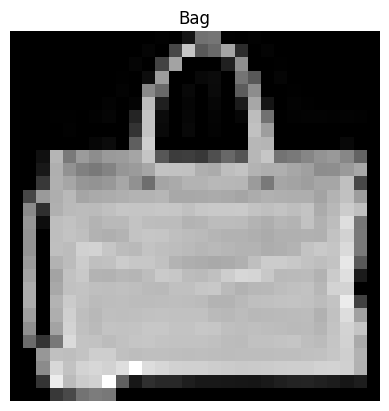

In [21]:
#show a sample
# torch.manual_seed(42)
rand_idx = torch.randint(len(train_features_batch), (1,)).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label.item()])
plt.axis(False)
plt.show()


# Building Baseline Model

In [22]:
# Create a flatten layer
flatten = nn.Flatten()

#Get a single image from the data loader
X = train_features_batch[0]
print(f'Befor Flatening: {X.shape}')

output = flatten(X)
print(f'After Flatening: {output.shape}')


Befor Flatening: torch.Size([1, 28, 28])
After Flatening: torch.Size([1, 784])


In [23]:
class FashionMNISTModelV0(nn.Module):
    def __init__(
            self,
            input_size: int,
            hidden_size: int,
            output_size: int
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [24]:
torch.manual_seed(42)

# Setup the model
model_0 = FashionMNISTModelV0(
    input_size=784,
    hidden_size=10,
    output_size=len(class_names)
)

print(model_0)

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)


In [25]:
# Setup loss, optimizer and train the model
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)


# Creating a funtion to time our experiment
    Model's Perfomance to find how fast it runs

In [26]:
from timeit import default_timer as timer
def print_train_time(
        start: float,
        end: float,
        device: torch.device = torch.device('cpu')
):
    total_time = end - start
    print(f'Training time: {total_time:.2f} seconds, Device: {device}')
    return total_time

#testing time fns
start = timer()
# Some code
end = timer()
print_train_time(start, end)

Training time: 0.00 seconds, Device: cpu


6.259989459067583e-05

In [27]:
# traing loop
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 2

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')

    #Set Trainig loss
    train_loss = 0

    for batch, (X,y) in enumerate(train_loader):
        
        #training
        model_0.train()

        #Forward pass
        y_pred = model_0(X)

        #Calculate loss (per batch)
        loss = loss_fn(y_pred,y)
        train_loss += loss

        # Optimize zero grad
        optimizer.zero_grad()

        # Loss backards 
        loss.backward()

        #Optimizer step
        optimizer.step()

        if batch%400==0:
            print(f'Looked at {batch*len(X)/(len(train_loader.dataset))} samples...')

    train_loss /= len(train_loader)

    #testing
    test_loss, test_acc = 0,0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_loader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

    print(f'\nTrain loss: {train_loss: .4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu)




  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...


 50%|█████     | 1/2 [00:30<00:30, 30.16s/it]


Train loss:  0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...


100%|██████████| 2/2 [00:58<00:00, 29.02s/it]


Train loss:  0.4763 | Test loss: 0.4799, Test acc: 83.1969
Training time: 58.06 seconds, Device: cpu


In [28]:
next(model_0.parameters()).device

device(type='cpu')

# Make Preditions and get Model_0 Results

In [29]:
import torch.utils


torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device=torch.device('cpu')
               ):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            #Make prediction
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            #loss and acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"Model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model_0,test_loader,loss_fn,accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:03<00:00, 87.64it/s]


{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47989004850387573,
 'model_acc': 83.19688498402556}

## Setup device agnostic code

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Building a model with non-linearity

In [31]:
class FashionMNISTModelV1(nn.Module):
    def __init__(
            self,
            input_size: int,
            hidden_size: int,
            output_size: int
                 ):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

torch.manual_seed(42)  
model_1 = FashionMNISTModelV1(
    input_size=784,
    hidden_size=10,
    output_size=len(class_names)
).to(device)

print(model_1,next(model_1.parameters()).device)


FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
) cuda:0


# Setup a Loss and Optimizer and evaluation metrices

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

# Training and Testing Funtion
* `train_step()`
* `test_step()`

In [33]:
def train_step(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device
):
    #training
    model.to(device)
    train_loss, train_acc = 0,0
    for batch, (X,y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        model.train()
        y_pred = model(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400==0:
            print(f'Looked at {batch*len(X)/(len(train_loader.dataset))} samples...')
        
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)
    print(f'Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}')
    


In [34]:
def test_step(
        model: torch.nn.Module,
        data_loader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device
):
    #testing
    model.to(device)
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        #Adjust the loss and acc and print
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')
        

In [35]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
#Create a optimization and eval loop using trian_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model_1,train_loader,loss_fn,optimizer,accuracy_fn,device)
    test_step(model_1,test_loader,loss_fn,accuracy_fn,device)

train_time_start_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,train_time_start_end_on_gpu,device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 1.0920 | Train acc: 61.3433


 33%|███▎      | 1/3 [00:18<00:37, 18.65s/it]

Test loss: 0.9564 | Test acc: 64.9960
Epoch: 1
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.7378 | Train acc: 73.6933


 67%|██████▋   | 2/3 [00:36<00:18, 18.13s/it]

Test loss: 0.7230 | Test acc: 74.2412
Epoch: 2
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.6678 | Train acc: 76.0767


100%|██████████| 3/3 [00:53<00:00, 17.68s/it]


Test loss: 0.6874 | Test acc: 75.6589
Training time: 53.03 seconds, Device: cuda


In [36]:
#device = "cpu"
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
#Create a optimization and eval loop using trian_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model_1,train_loader,loss_fn,optimizer,accuracy_fn,"cpu")
    test_step(model_1,test_loader,loss_fn,accuracy_fn,"cpu")

train_time_start_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu,train_time_start_end_on_gpu,"cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.6444 | Train acc: 76.5750


 33%|███▎      | 1/3 [00:27<00:54, 27.04s/it]

Test loss: 0.6778 | Test acc: 75.3894
Epoch: 1
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.6262 | Train acc: 77.0517


 67%|██████▋   | 2/3 [00:53<00:26, 26.65s/it]

Test loss: 0.6763 | Test acc: 75.5891
Epoch: 2
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.6161 | Train acc: 77.4667


100%|██████████| 3/3 [01:28<00:00, 29.56s/it]

Test loss: 0.6481 | Test acc: 76.8271
Training time: 88.69 seconds, Device: cpu


In [37]:
model_0_results = eval_model(model_0,test_loader,loss_fn,accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:02<00:00, 147.48it/s]


{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47989004850387573,
 'model_acc': 83.19688498402556}

In [38]:
model_1_results = eval_model(model_1,test_loader,loss_fn,accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:01<00:00, 218.10it/s]


{'Model_name': 'FashionMNISTModelV1',
 'model_loss': 0.64810711145401,
 'model_acc': 76.8270766773163}

# Working with CNN

In [39]:
#create a model with a convelutional nueral network

class FashionMNISTModelV2(nn.Module):
    def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )

    def forward(self,x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x
            

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

In [41]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

Setup loss function and optimizer

In [42]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

### Training and Testing loop
Already we have the funtion
* `train_step()`
* `test_step()`

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_on_model_2 = timer()

# train and test the model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}')
    train_step(model_2, train_loader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_2, test_loader, loss_fn, accuracy_fn, device)

train_time_end_on_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_on_model_2, train_time_end_on_model_2, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.6075 | Train acc: 78.0317


 33%|███▎      | 1/3 [00:15<00:31, 15.72s/it]

Test loss: 0.4089 | Test acc: 86.0024
Epoch: 1
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.3628 | Train acc: 86.9367


 67%|██████▋   | 2/3 [00:30<00:15, 15.17s/it]

Test loss: 0.3800 | Test acc: 86.8810
Epoch: 2
Looked at 0.0 samples...
Looked at 0.21333333333333335 samples...
Looked at 0.4266666666666667 samples...
Looked at 0.64 samples...
Looked at 0.8533333333333334 samples...
Train loss: 0.3260 | Train acc: 88.2550


100%|██████████| 3/3 [00:45<00:00, 15.12s/it]

Test loss: 0.3400 | Test acc: 87.7895
Training time: 45.36 seconds, Device: cuda


In [44]:
# Get the results
model_2_results = eval_model(model_2, test_loader, loss_fn, accuracy_fn, device)

model_2_results

100%|██████████| 313/313 [00:01<00:00, 236.84it/s]


{'Model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3399975001811981,
 'model_acc': 87.78953674121406}

## Compare model result and training time

In [45]:
import pandas as pd
compare_results = pd.DataFrame(
    [model_0_results, 
        model_1_results, 
        model_2_results]
)
compare_results["training Time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]

In [46]:
compare_results

,Model_name,model_loss,model_acc,training Time
0,FashionMNISTModelV0,0.479890,83.196885,58.058236
1,FashionMNISTModelV1,0.648107,76.827077,88.694404
2,FashionMNISTModelV2,0.339998,87.789537,45.360222


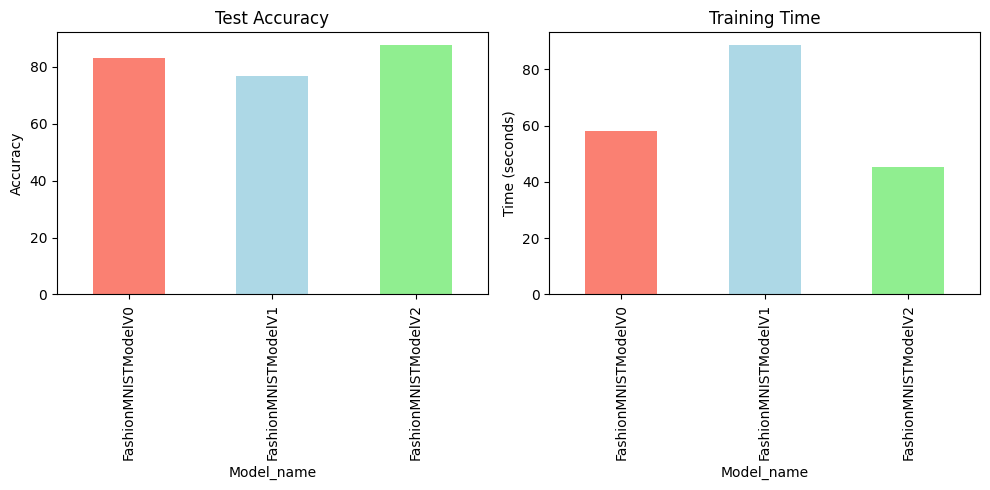

In [47]:
#Plot the results
compare_results.set_index("Model_name", inplace=True)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
compare_results["model_acc"].plot(kind="bar", color=["salmon", "lightblue", "lightgreen"])
plt.title("Test Accuracy")
plt.ylabel("Accuracy")
plt.subplot(1, 2, 2)
compare_results["training Time"].plot(kind="bar", color=["salmon", "lightblue", "lightgreen"])  
plt.title("Training Time")
plt.ylabel("Time (seconds)")
plt.tight_layout()
plt.show()

# Make and evaluate with random predition  with best model

In [48]:
def make_predictions(
        model: torch.nn.Module,
        data: list,
        device: torch.device = device
):
    pred_probas = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X in data:
            X = torch.unsqueeze(X, 0).to(device)
            y_pred = model(X)
            y_probas = torch.softmax(y_pred.squeeze(), dim=0)
            pred_probas.append(y_probas.cpu())
    return torch.stack(pred_probas)
            


In [49]:
import random
test_samples,test_labels = [],[]
for sample,label in random.sample(list(test_data), 9):
    test_samples.append(sample)
    test_labels.append(label)


In [50]:
#make Preditcions
pred_probas = make_predictions(model_2,test_samples)
pred_probas[:2]

tensor([[2.6793e-05, 2.9923e-05, 1.2009e-02, 1.4189e-05, 9.7876e-01, 2.4266e-08,
         8.7650e-03, 9.6904e-07, 3.9269e-04, 2.8632e-06],
        [8.9843e-01, 3.3060e-07, 3.0084e-05, 2.1631e-04, 2.3478e-06, 2.1177e-10,
         1.0131e-01, 6.5524e-09, 3.3131e-06, 6.6668e-09]])

In [51]:
pred_classes = pred_probas.argmax(dim=1)
pred_classes

tensor([4, 0, 7, 2, 4, 2, 4, 6, 0])

In [52]:
test_labels

[4, 6, 7, 2, 4, 2, 4, 6, 0]

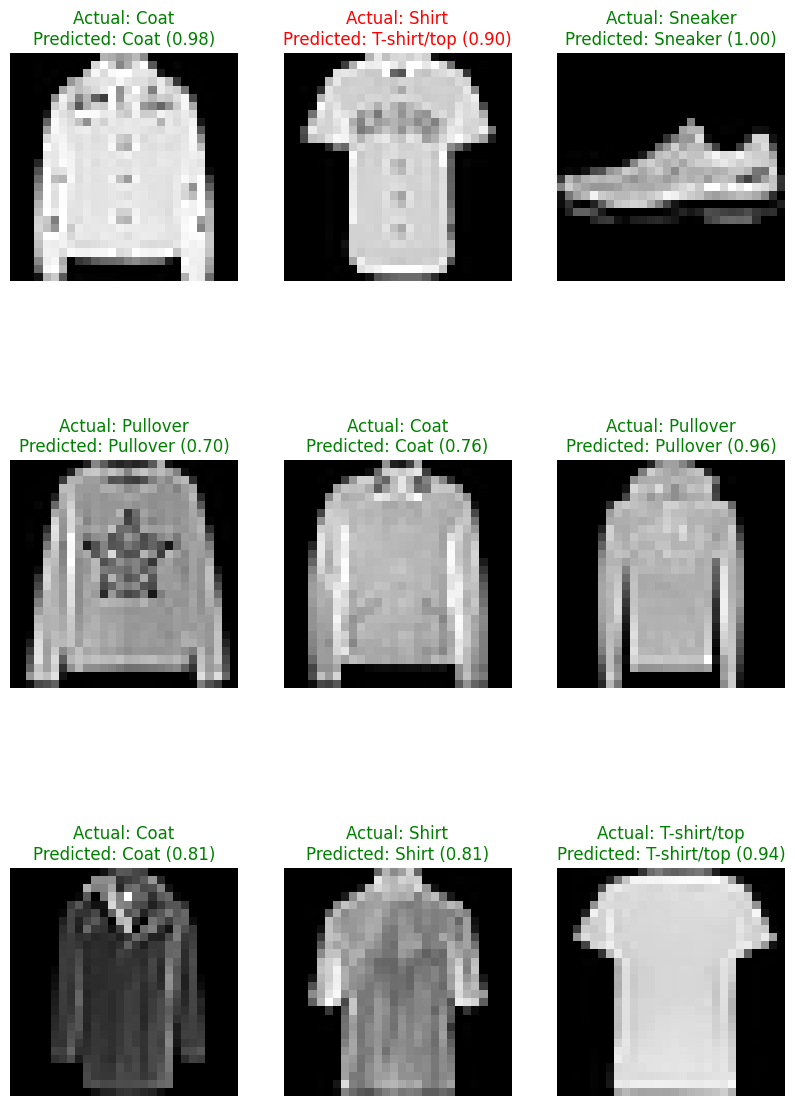

In [53]:
# Plot the images with predictions
fig = plt.figure(figsize=(10, 15))
rows, cols = 3, 3
for i,sample in enumerate(test_samples):
    plt.subplot(rows, cols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')

    #find the predicted class
    pred_class = pred_classes[i].item()
    true_class = test_labels[i]
    pred_proba = pred_probas[i][pred_class].item()

    #create a title
    plt.title(f"Actual: {class_names[true_class]}\nPredicted: {class_names[pred_class]} ({pred_proba:.2f})")

    if pred_class != true_class:
        plt.title(f"Actual: {class_names[true_class]}\nPredicted: {class_names[pred_class]} ({pred_proba:.2f})", color='red')
    else:
        plt.title(f"Actual: {class_names[true_class]}\nPredicted: {class_names[pred_class]} ({pred_proba:.2f})", color='green')

    plt.axis(False)


# Making a Confusion Matrix

In [54]:
from tqdm.auto import tqdm

y_pred = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_loader,desc='Predicting'):
        X,y = X.to(device), y.to(device)
        y_pred.append(model_2(X).squeeze().softmax(0).argmax(dim=1).cpu())

y_pred_tensor = torch.cat(y_pred)
y_pred_tensor

Predicting: 100%|██████████| 313/313 [00:01<00:00, 257.54it/s]


tensor([9, 2, 1,  ..., 8, 3, 2])

In [55]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

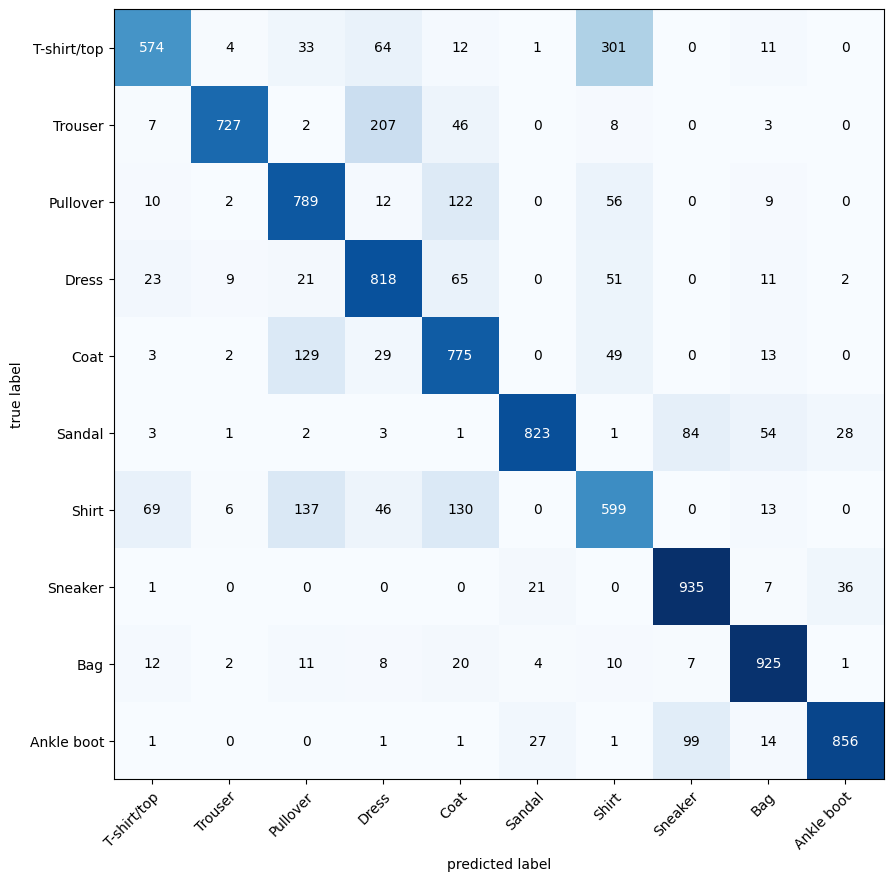

In [65]:
# setup the confusion matrix
confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat.update(y_pred_tensor, test_data.targets)
confmat.compute()

# plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat.compute().numpy(), figsize=(10, 10), class_names=class_names)



In [66]:
# Save and load best performing model
from pathlib import Path

# Save the model
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(exist_ok=True, parents=True)
MODEL_NAME = "fashion_mnist_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

In [67]:
# Load the model
torch.manual_seed(42)

loaded_model = FashionMNISTModelV2(1,10,len(class_names)).to(device)
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [68]:
model_2_results

{'Model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3399975001811981,
 'model_acc': 87.78953674121406}

In [69]:
torch.manual_seed(42)

loaded_model_results = eval_model(loaded_model, test_loader, loss_fn, accuracy_fn, device)
loaded_model_results

100%|██████████| 313/313 [00:01<00:00, 236.70it/s]


{'Model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3399975001811981,
 'model_acc': 87.78953674121406}

# -- THE END --